## Business Problem:
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
df = pd.read_csv("walmart_data.csv")

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


● User_ID: User ID

● Product_ID: Product ID

● Gender: Sex of User

● Age: Age in bins

● Occupation: Occupation(Masked)

● City_Category: Category of the City (A,B,C)

● StayInCurrentCityYears: Number of years stay in current city

● Marital_Status: Marital Status

● ProductCategory: Product Category (Masked)

● Purchase: Purchase Amount

In [5]:
df.shape

(550068, 10)

In [6]:
df["Gender"].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [7]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

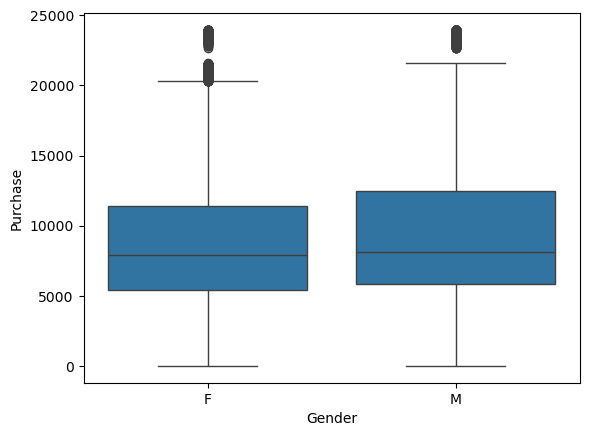

In [13]:
sns.boxplot(x = 'Gender', y = 'Purchase', data = df)
plt.show()

In [14]:
# no significant difference between the medians, we can't assume

# so will wait till we do CLT on this data

In [15]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


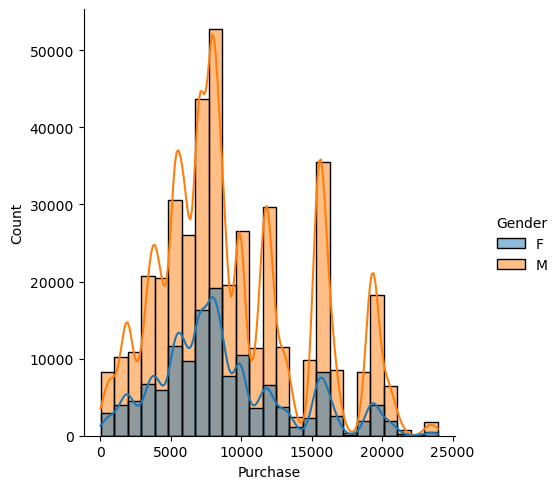

In [16]:
sns.displot(x='Purchase', 
            hue='Gender', 
            data=df, 
            bins=25, 
            kde=True)
plt.show()

## CLT

In [17]:
s = 300 # sample size
iterations = 1000 # total number of samples

In [18]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [19]:
df.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,75.0,9078.613333,4355.898303,474.0,6482.0,8066.0,11593.0,19201.0
M,225.0,9497.502222,5201.743084,374.0,5622.0,8087.0,12289.0,23928.0


In [20]:
df.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,73.0,8532.671233,4336.265210,1717.0,5878.0,8073.0,11558.0,20532.0
M,227.0,9182.766520,5075.818321,26.0,5693.0,8016.0,12523.0,20880.0


In [21]:
df.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,65.0,8566.400000,4819.504302,769.0,5331.0,7039.0,11530.0,20283.0
M,235.0,9945.417021,5207.460229,25.0,6102.0,8682.0,13079.0,23752.0


## Males

In [22]:
s = 300 # sample size
iterations = 1000 # total number of samples

In [23]:
male_sample_mean = [df[df["Gender"]=="M"].sample(s)["Purchase"].mean() for i in range(iterations)]

In [26]:
male_sample_mean[:5]

[np.float64(10020.606666666667),
 np.float64(9269.52),
 np.float64(9390.043333333333),
 np.float64(9582.34),
 np.float64(9415.736666666666)]

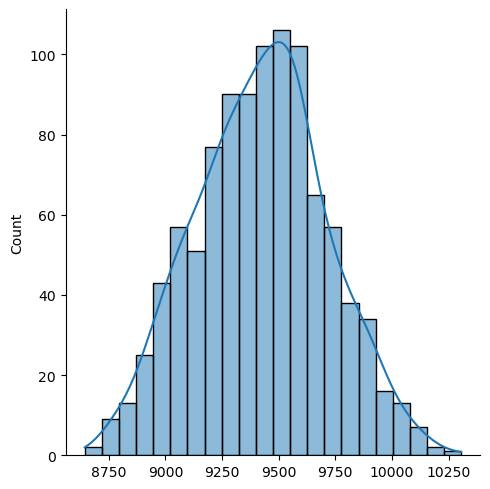

In [25]:
sns.displot(male_sample_mean, kde = True)
plt.show()

In [27]:
np.mean(male_sample_mean)

np.float64(9422.959206666666)

In [28]:
female_sample_mean = [df[df["Gender"]=="F"].sample(s)["Purchase"].mean() for i in range(iterations)]

In [29]:
female_sample_mean[:5]

[np.float64(8567.36),
 np.float64(8764.526666666667),
 np.float64(8785.62),
 np.float64(8770.776666666667),
 np.float64(9010.64)]

In [30]:
np.mean(female_sample_mean)

np.float64(8738.552196666666)

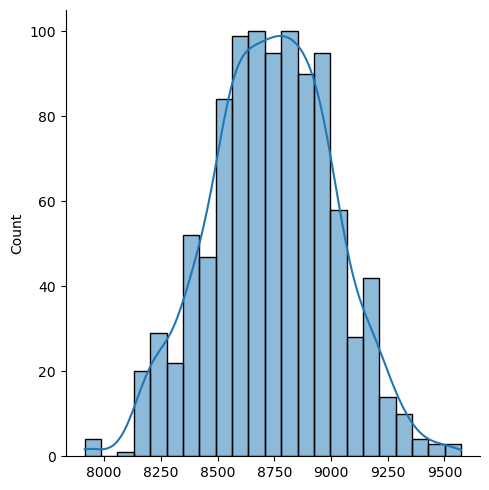

In [31]:
sns.displot(female_sample_mean, kde = True)
plt.show()

# confidence Interval

In [32]:
# zscore and percentile method for finding the confidence interval (95%)

In [33]:
## Males
males_lower_limit = np.mean(male_sample_mean) - 1.96 * np.std(male_sample_mean)

In [34]:
males_upper_limit = np.mean(male_sample_mean) + 1.96 * np.std(male_sample_mean)

In [35]:
(males_lower_limit, males_upper_limit)

(np.float64(8858.607266705547), np.float64(9987.311146627786))

In [36]:
## Females
females_lower_limit = np.mean(female_sample_mean) - 1.96 * np.std(female_sample_mean)

In [37]:
females_upper_limit = np.mean(female_sample_mean) + 1.96 * np.std(female_sample_mean)

In [38]:
(females_lower_limit, females_upper_limit)

(np.float64(8208.549359274692), np.float64(9268.55503405864))

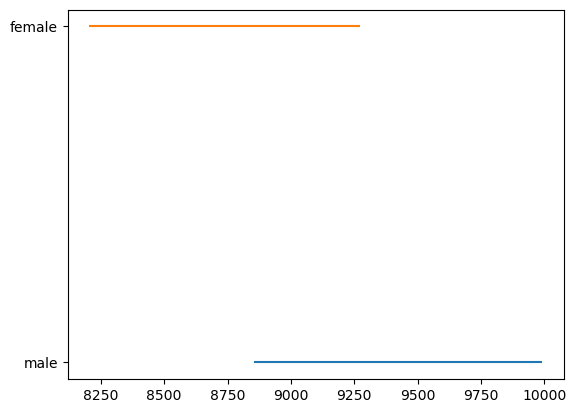

In [39]:
plt.plot((males_lower_limit, males_upper_limit), [0, 0])

plt.plot((females_lower_limit, females_upper_limit), [1, 1])

plt.yticks(range(2), ["male", "female"])

plt.show()

## Percentile method

In [40]:
male_sample_mean[:5]

[np.float64(10020.606666666667),
 np.float64(9269.52),
 np.float64(9390.043333333333),
 np.float64(9582.34),
 np.float64(9415.736666666666)]

In [41]:
male_confidence_interval = np.percentile(male_sample_mean, [2.5, 97.5])
male_confidence_interval

array([8879.46425   , 9988.53608333])

In [42]:
female_confidence_interval = np.percentile(female_sample_mean, [2.5, 97.5])
female_confidence_interval

array([8209.83275   , 9264.18116667])

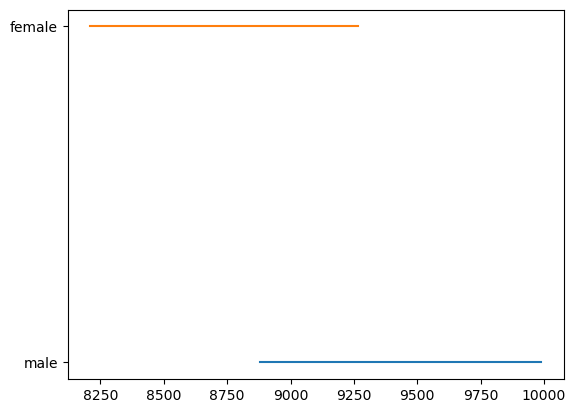

In [43]:
plt.plot((male_confidence_interval[0], male_confidence_interval[1]), [0, 0])

plt.plot((female_confidence_interval[0], female_confidence_interval[1]), [1, 1])

plt.yticks(range(2), ["male", "female"])

plt.show()

In [44]:
## 90% CI
## marital status 
## age bins